# Explonatory anlaysis of Species of the flower

### Required Libraries

This notebook uses several Python packages that come standard with the Anaconda Python distribution.<br>
The primary libraries that we'll be using are:<br>
<strong>NumPy</strong>: Provides a fast numerical array structure and helper functions.<br>
<strong>pandas</strong>: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.<br>
<strong>scikit-learn</strong>: The essential Machine Learning package in Python.<br>
<strong>matplotlib</strong>: Basic plotting library in Python; most other Python plotting libraries are built on top of it.<br>
<strong>Seaborn</strong>: Advanced statistical plotting library.<br>
<strong>watermark</strong>: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.<br>

To make sure you have all of the packages you need, install them with conda/pip:

    conda/pip install numpy pandas scikit-learn matplotlib seaborn

    conda install -c conda-forge watermark

conda may ask you to update some of them if you don't have the most recent version. Allow it to do so

### Problem Statement:


Data set has 4 variables Sepel length, Sepal width, Petal length and petal width
Species of the flower has to be identified using above variables.

The four measurements we're using data currently come from hand-measurements by the field researchers, but they will be automatically measured by an image processing model in the future.

###### The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

<font size="4">Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?</font>

We are identifying species of the flower using variables given in the data set. This problem needs classification.

<font size="4">Did you define the metric for success before beginning?</font>

As problem statement requires classification, we aim to acheive atleast 90% accuracy to the problem.

<font size="4">Did you understand the context for the question and the scientific?</font>

We're doing data analysis to classify the species of flowers from pictures taken on the smartphone. In the future, we can use our analysis as a pipeline that will be connected to another pipeline that automatically measures from pictures the traits we're using to perform this classification.

<font size="4"> Did you consider limitations of the available data? <font>

The data set we currently have is only for three types of Iris flowers. The model built off of this data set will only work for those Iris flowers, so we will need more data to create a general flower classifier.

### Download data using Kaggle API

In [54]:
#install kaggle api using pip
import kaggle
#use ! to run bash command
!kaggle datasets download -d uciml/iris

### Read the data

The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

       Is there anything wrong with the data?
       Are there any quirks with the data?
       Do I need to fix or remove any of the data?
Let's start by reading the data into a pandas DataFrame.

In [33]:
import pandas as pd

iris_data = pd.read_csv('iris/iris.csv')
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The data seems to be in a usable format. <br>
Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.

###### Check for the missing data

In [35]:
iris_data = pd.read_csv('iris/iris.csv', na_values=['NA'])
# drop Id column as the information is not needed
iris_data = iris_data.drop(columns=['Id'])

We can tell pandas to automatically identify missing values if it knows our missing value marker.

Let's find the summary statistics of our dataset

In [36]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Next, let's create a scatterplot matrix. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes.

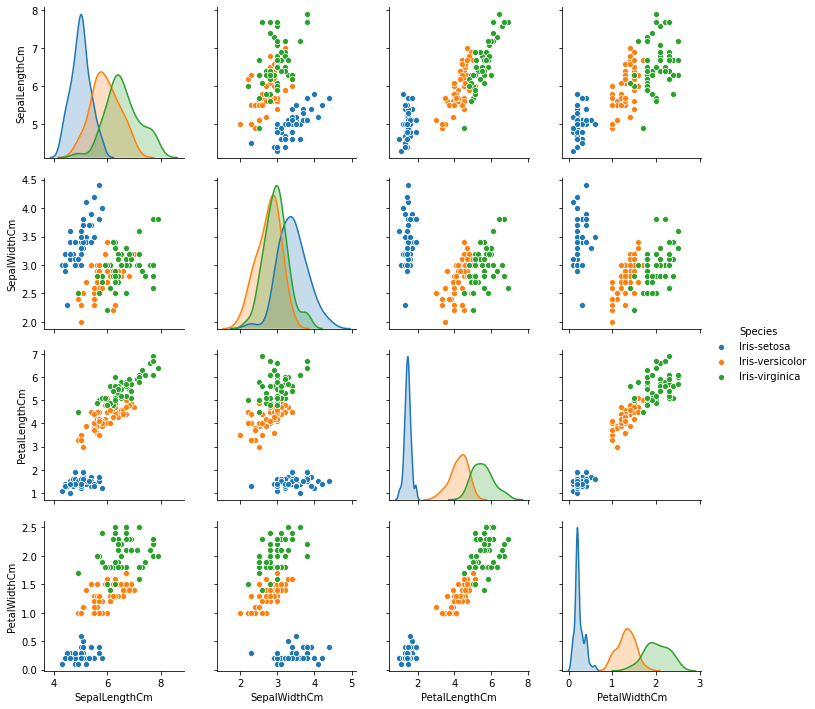

In [37]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sb.pairplot(iris_data.dropna(),hue='Species');

From the scatterplot matrix, we can already see some issues with the data set: <br>
    <Bullet> There are some clear outliers in the measurements that may be erroneous: one sepal_width_cm entry for Iris-setosa falls well outside its normal range, and several sepal_length_cm entries for Iris-versicolor are near-zero for some reason.</Bullet><br>
    <Item>We had to drop those rows with missing values.</Item>

### Cleaning Data

In the case of the one anomalous entry for Iris-setosa, let's say our field researchers know that it's impossible for Iris-setosa to have a sepal width below 2.5 cm. Clearly this entry was made in error, and we're better off just scrapping the entry than spending hours finding out what happened.

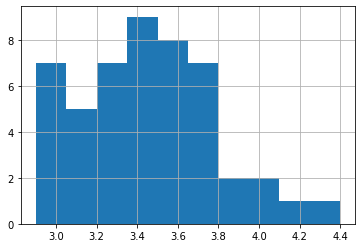

In [40]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['Species'] != 'Iris-setosa') | (iris_data['SepalWidthCm'] >= 2.5)]
iris_data.loc[iris_data['Species'] == 'Iris-setosa', 'SepalWidthCm'].hist();

Lets check for missing values

In [41]:
iris_data.loc[(iris_data['SepalLengthCm'].isnull()) |
              (iris_data['SepalWidthCm'].isnull()) |
              (iris_data['PetalLengthCm'].isnull()) |
              (iris_data['PetalWidthCm'].isnull())]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


We don't have any missing values in our data

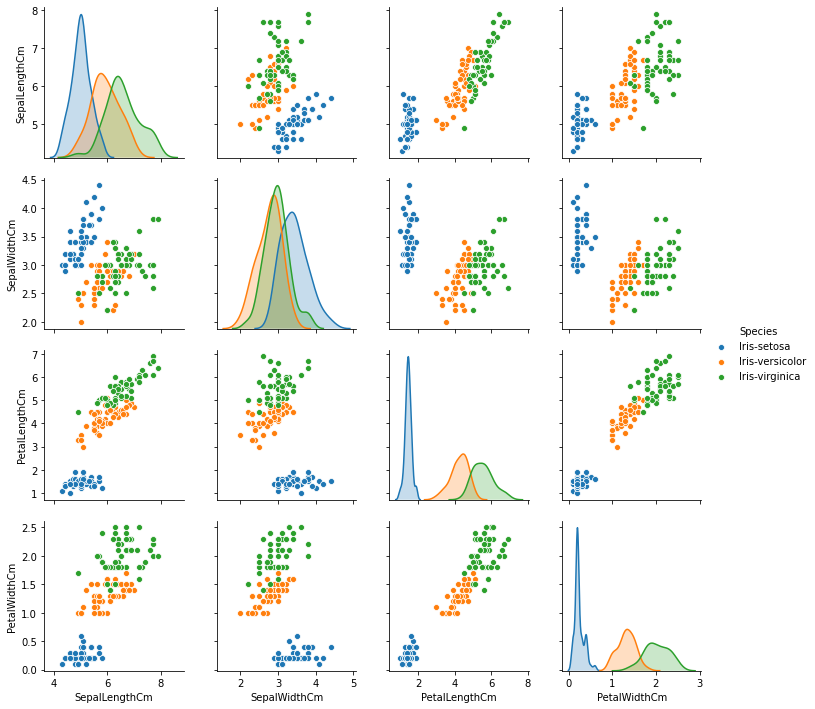

In [46]:
sb.pairplot(iris_data, hue='Species');

Plot everything you can about the data at this stage of the analysis so you can visually confirm everything looks correct

We can also make violin plots of the data to compare the measurement distributions of the classes. Violin plots contain the same information as box plots, but also scales the box according to the density of the data.

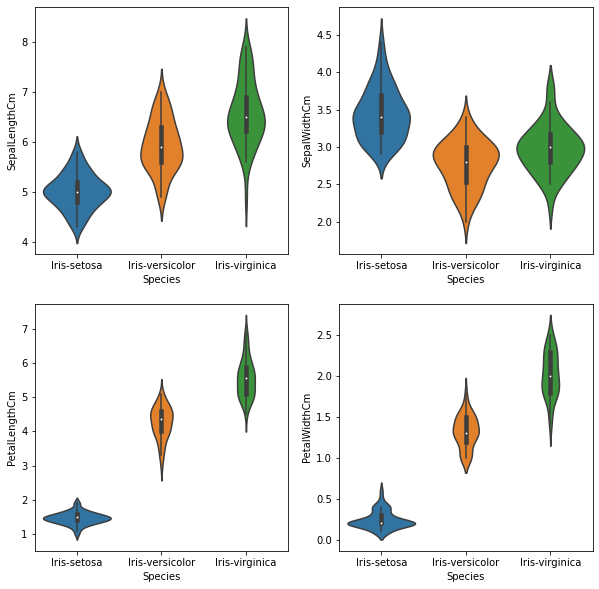

In [47]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data.columns):
    if column == 'Species':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='Species', y=column, data=iris_data)

### Classification of data

###### Split the data into testing and training data 

In [49]:
# We can extract the data in this format from pandas like this:
all_inputs = iris_data[['SepalLengthCm', 'SepalWidthCm',
                             'PetalLengthCm', 'PetalWidthCm']].values

# Similarly, we can extract the Species labels
all_labels = iris_data['Species'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the species in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [50]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.30, random_state=1)

80% of our dat is used to train the model where as rest 20% will be used to test the model

In [51]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)


0.9555555555555556

Our model acheived 95% accuracy

(array([  1.,   3.,  11.,  27.,   0.,  77., 198., 315., 270.,  98.]),
 array([0.78947368, 0.81052632, 0.83157895, 0.85263158, 0.87368421,
        0.89473684, 0.91578947, 0.93684211, 0.95789474, 0.97894737,
        1.        ]),
 <a list of 10 Patch objects>)

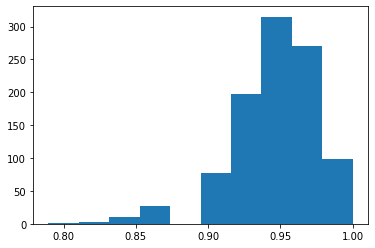

In [52]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)


Model performs differently on different subsets of training data. Result implies that our model is overfitting.

###### Cross- Validation

<strong>k-fold cross-validation</strong>: Split the original data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated k times such that each subset is used as the testing set exactly once.<br>
We perform 10-fold classification here.

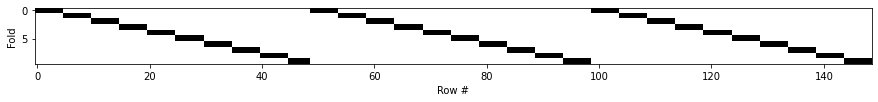

In [55]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

Stratified k-fold keeps the class proportions the same across all of the folds, which is vital for maintaining a representative subset of our data set. 

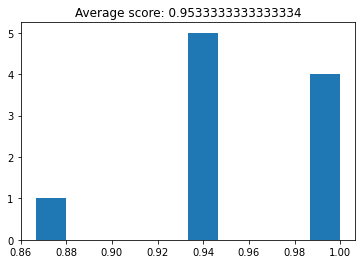

In [56]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)));

Now we have much more consisitant accuaracy rating for different subsets of training data

###### Parameter Tuning

Every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, if we severely limit the depth of our decision tree classifier:



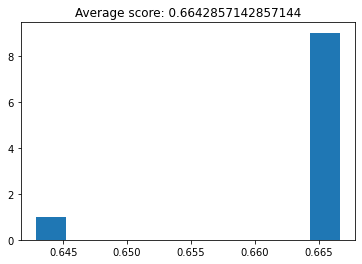

In [57]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)));

Accuracy has dropped after tuning the parameter depth.<br>
We can use grid search to measure best tuning for our parameter.<br> We can start with tuning two parameters but we can expand out tuning.

In [60]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

C:\Users\deepika\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.959731543624161
Best parameters: {'max_depth': 3, 'max_features': 2}


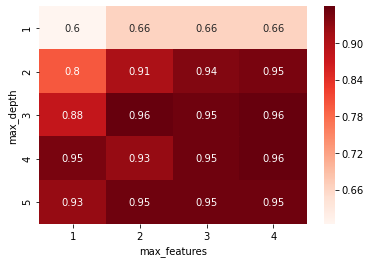

In [62]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Reds', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth');

We know that we need a max_depth of at least 2 to allow the decision tree to make more than a one-off decision.

max_features doesn't make difference as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify.

In [63]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

C:\Users\deepika\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.9664429530201343
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 3, 'splitter': 'best'}


In [64]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

###### Random Forest Classification

In [65]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

C:\Users\deepika\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.9664429530201343
Best parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 10}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

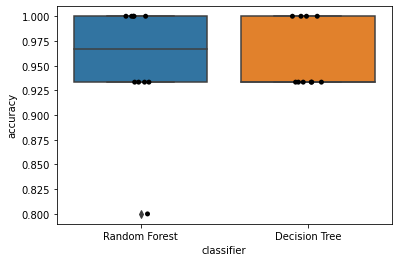

In [66]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black');

Both calssification perform same on the dataset. As our dataset has only 4 variables both the models performed similarly.